Importing Libraries

In [1]:
import pandas as pd
import os

Merging 12 months of data into a single file

In [2]:
# files = [file for file in os.listdir('./Sales_Data')]

# df = pd.DataFrame()
# for file in files:
#   mdf = pd.read_csv('./Sales_Data/{0}'.format(file))
#   df = pd.concat([df,mdf])

# df.head()
# df.to_csv("all_data.csv",index =False)

Reading updated dataframe

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data 

Drop rows of Nan

In [4]:
# df[df['Order Date'].isna()] # true if value is Nan, false otherwise. Boolean indexing -> isna will give an array of the same length of df.['Order Date'] having true/false
# Print rows whose Order Date column is nan

# df.isna() will check each field and then change the value to True or False
# any will check if any value is True over the axis = 1,i.e., rows, and then will return a array of True and False
# nandf will be generated by using boolean indexing on df
# nandf = df[df.isna().any(axis=1)] # rows having atleat 1 Nan value

df = df.dropna(how='all') #Droping rows having all Nans


Find 'or' and delete it

In [5]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df

df = df[df['Order Date'].str[0:2] != 'Or'] 

##### Augment data with additional columns

### Adding the month column

In [6]:
df['Month'] = df['Order Date'].str[0:2]
df.Month = df.Month.astype('int16')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [7]:
# df['Quantity Ordered']=df['Quantity Ordered'].astype('int16') 
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered']) #we don't have to specify the type, correct type will be choosen automaitcally 
# df['Price Each']=df['Price Each'].astype('float16')
df['Price Each']=pd.to_numeric(df['Price Each'])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

lst=list(df.columns)
lst = lst[0:2]+[lst[-1]]+lst[2:-1]
df = df[lst]

df.head()

,Order ID,Product,Sales,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,23.90,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,99.99,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,600.00,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,11.99,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,11.99,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add city column


In [8]:
def getCity(x:str) -> str:
  return x.split(',')[1] + x.split(',')[2][:3]

# df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['City'] = df['Purchase Address'].apply(getCity)

df['City']

0                 Dallas TX
1                 Boston MA
2            Los Angeles CA
3            Los Angeles CA
4            Los Angeles CA
                ...        
186844       Los Angeles CA
186845     San Francisco CA
186846     San Francisco CA
186847     San Francisco CA
186848     San Francisco CA
Name: City, Length: 185950, dtype: object

### What was the best month for sale? How much was earned that month?


In [9]:
results = df.groupby('Month').sum()

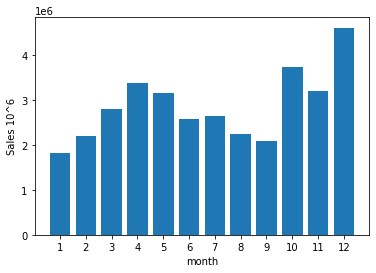

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results.Sales)
plt.xticks(months)
plt.ylabel('Sales 10^6')
plt.xlabel('month')
plt.show()

#### Which city had the highest number of sales ?

In [11]:
results = df.groupby('City').sum()
results

,Sales,Quantity Ordered,Price Each,Month
City,,,,
Atlanta GA,2795498.58,16602,2779908.20,104794.0
Austin TX,1819581.75,11153,1809873.61,69829.0
Boston MA,3661642.01,22528,3637409.77,141112.0
Dallas TX,2767975.40,16730,2752627.82,104620.0
Los Angeles CA,5452570.80,33289,5421435.23,208325.0
New York City NY,4664317.43,27932,4635370.83,175741.0
Portland ME,449758.27,2750,447189.25,17144.0
Portland OR,1870732.34,11303,1860558.22,70621.0
San Francisco CA,8262203.91,50239,8211461.74,315520.0


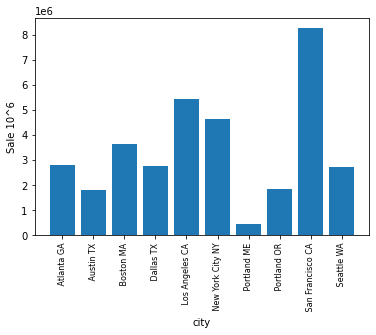

In [12]:
cities = df.City.unique()
cities = list(cities)
cities.sort()
# in results cities are in aplabetical order, so there sales are in that order
# so while plotting we have to arrange x & y ticks in the same manner, arranging x is easier 

plt.bar(cities,results.Sales)
plt.xticks(cities,rotation = 'vertical',size=8) #rotation and size are optional parameters
plt.ylabel('Sale 10^6')
plt.xlabel('city')
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [13]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df.head()

df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Sales,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,23.90,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,99.99,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22,30
2,176560,Google Phone,600.00,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,38
3,176560,Wired Headphones,11.99,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,38
4,176561,Wired Headphones,11.99,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,9,27


In [19]:
hours = range(0,24)
results = df.groupby('Hour').count() # Number of occurrence of orders for that hour
results

plt.plot(hours,results['Order ID'])
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of hours')
plt.show()

,Order ID,Product,Sales,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


### Which products are most often sold together

In [20]:
# Products are same if their Order ID's are same
ndf = df[df['Order ID'].duplicated(keep=False)] # keep all rows having duplicate order id

ndf['Grouped'] = ndf.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
ndf.head()

ndf = ndf[['Order ID','Grouped']].drop_duplicates() # Keep only first copy of those rows for which the value of Order ID and Grouped columns match 
ndf

C:\Users\DELL\AppData\Local\Temp/ipykernel_8592/2213008920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Grouped'] = ndf.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186780,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186782,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186790,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186802,259314,"Wired Headphones,AAA Batteries (4-pack)"


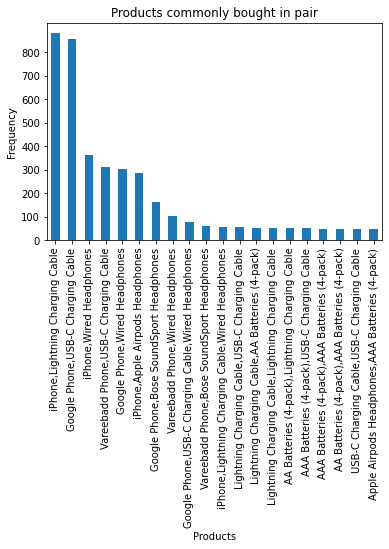

In [21]:
# No of times a pair is repeated in Grouped col, getting top 100 repeated pairs
# ndf.Grouped.value_counts()[0:100]

ndf.Grouped.value_counts()[0:20].plot(kind='bar',title = 'Products commonly bought in pair',yticks = [n*100 for n in range(0,9)],ylabel = 'Frequency',xlabel = 'Products')
plt.show()

### Which product was sold the most

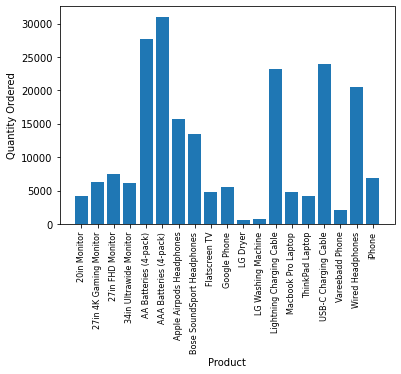

In [58]:
df.head()
products=sorted(list(df.Product.unique()))
products

results = df.groupby('Product').sum()
results

# Graph of product vs quanity
plt.bar(products,results['Quantity Ordered'])
plt.xticks(products,rotation = 'vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_8592/3368004477.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


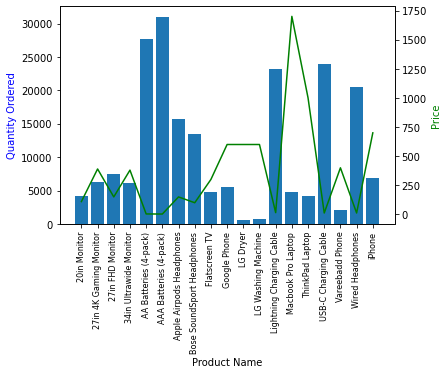

In [70]:
prices = df.groupby('Product').mean()['Price Each'] # To get price of each product 
prices

fig, ax1 = plt.subplots()
ax2  =ax1.twinx() # x axis will be same for both the plots, we will have to y axis

ax1.bar(products,results['Quantity Ordered'])
ax2.plot(products,prices,'g-') 
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color = 'b')
ax2.set_ylabel('Price',color = 'g')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

# If quantity ordered is high then, price is low